In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\Jupyter Notebook\Boston-house-price-data.csv')

In [3]:
df.shape

(506, 14)

In [4]:
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.shape

(506, 14)

In [7]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(df[['MEDV']])

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [9]:
imputer.statistics_

array([22.53280632])

In [10]:
df['MEDV'] = imputer.transform(df[['MEDV']])

In [11]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
df = df.fillna(0)

In [13]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set_style('darkgrid')

<Axes: ylabel='ZN'>

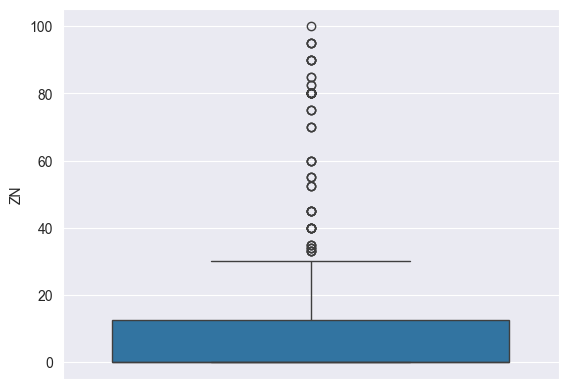

In [17]:
sns.boxplot(df, y = 'ZN')

In [18]:
import numpy as np

In [20]:
Q1 = np.percentile(df['ZN'], 25, interpolation='midpoint')
Q3 = np.percentile(df['ZN'], 75, interpolation='midpoint')


In [21]:
IQR = Q3 -Q1

In [22]:
lowerbound = Q1- 1.5*IQR
upperbound = Q1- 1.5*IQR

In [23]:
df = df[(df.ZN < upperbound) & (df.ZN > lowerbound)]

In [24]:
df.shape

(0, 14)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     0 non-null      float64
 1   ZN       0 non-null      float64
 2   INDUS    0 non-null      float64
 3   CHAS     0 non-null      int64  
 4   NOX      0 non-null      float64
 5   RM       0 non-null      float64
 6   AGE      0 non-null      float64
 7   DIS      0 non-null      float64
 8   RAD      0 non-null      int64  
 9   TAX      0 non-null      float64
 10  PTRATIO  0 non-null      float64
 11  B        0 non-null      float64
 12  LSTAT    0 non-null      float64
 13  MEDV     0 non-null      float64
dtypes: float64(12), int64(2)
memory usage: 0.0 bytes


In [26]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [27]:
cat_col = df.select_dtypes('object').columns.tolist()

In [28]:
cat_col

[]

In [30]:
from sklearn.preprocessing import OneHotEncoder

# Use sparse_output instead of sparse
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df[cat_col])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [31]:
encoded_cols = encoder.get_feature_names_out(cat_col)

In [32]:
encoded_cols

array([], dtype=object)

In [ ]:
df[encoded_cols] = encoder.transform(df[cat_col])

In [ ]:
df

In [ ]:
df.drop(columns = cat_col, inplace = True)

In [ ]:
df.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(x)

In [ ]:
x[:] = scaler.transform(x)

In [ ]:
x

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y test_size = 0.2 random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.linear_model import LinerRegression
model = LinerRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_test[:5]

In [ ]:
y_pred[:5]

In [ ]:
from sklearn.metrics import mean_absolute_error


In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 50, max_iter = 100, tol = 0.1)

lasso_model.fit(X_train, y_train)

In [ ]:
lasso_pred = lasso_model.predict(X_test)


In [ ]:
mean_absolute_error(y_test, lasso_pred)

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 50, max_iter = 100, tol = 0.1)

ridge_model.fit(X_train, y_train)

In [ ]:
ridge_pred = ridge_model.predict(X_test)

In [ ]:
mean_absolute_error(y_test, ridge_pred)